# CS3072 - DATA SCIENCES - FINAL REPORT

#### Name: Khalid Arab
#### Student ID: s22107968

# Introduction
The primary aim of this project is to analyze demographic and socioeconomic data to predict whether an individual earns more than $50,000 annually. Income inequality is a pervasive issue in modern society, influencing various facets of life, such as access to healthcare, education, and social mobility. By identifying patterns in income distribution, this project contributes to a deeper understanding of the key factors that drive income disparities. Such an understanding can have practical applications in policy formulation, targeted advertising, and labor market analysis.

This project is based on the Adult dataset, a widely recognized benchmark dataset for classification problems in data science and machine learning. The dataset contains features such as age, education level, marital status, occupation, and hours worked per week, making it a rich source of information for analyzing the interplay between demographic factors and income.

The goals of this project are as follows:
1. To preprocess and clean the dataset, addressing issues such as missing values, inconsistent data types, and class imbalances.
2. To perform exploratory data analysis (EDA) to uncover relationships and patterns within the data, providing a foundation for the modeling phase.
3. To build predictive models using machine learning algorithms and evaluate their performance based on metrics such as accuracy, precision, recall, and F1-score.
4. To identify the most significant features influencing income prediction using interpretable machine learning techniques.
5. To discuss the broader implications of the findings, limitations of the study, and potential avenues for future research.

This report is structured to provide a comprehensive roadmap of the project. It begins with a detailed problem statement and background section, offering context and motivation for the analysis. The data section follows, describing the dataset and preprocessing steps in detail. The analysis section elaborates on the chosen methods and techniques, while the results section presents the outcomes in a clear and concise manner. Finally, the discussion section reflects on the findings, highlighting their significance and limitations.

---

# Problem Statement and Background

#### Problem Statement
The project aims to classify individuals into income categories (<=50K or >50K annually) using demographic and socioeconomic data.

#### Problem Aim
Through this analysis, the project seeks to answer the following questions:
- What demographic and socioeconomic factors are most influential in predicting income levels?
- How well can machine learning models classify individuals based on these factors?
- What limitations exist in the dataset and methodology, and how can they be addressed?

#### Background
Understanding the factors influencing income levels is critical not only for economic analysis but also for addressing broader social and policy-related questions. By identifying key drivers of income, this project aims to provide actionable insights that can inform decision-making at various levels.

The dataset used in this project, the Adult dataset, has been extensively studied in the field of data science. It is part of the UCI Machine Learning Repository and is often used as a benchmark for testing classification algorithms. The dataset includes features such as:
- **Demographic factors:** Age, gender, race, marital status, and native country.
- **Socioeconomic factors:** Education level, occupation, hours worked per week, and relationship status.

These features are both categorical and numerical, requiring careful preprocessing to ensure they are compatible with machine learning algorithms. The target variable is income, represented as a binary variable indicating whether the individual earns more or less than $50,000.

Previous studies have tackled similar classification problems using various machine learning techniques. For instance, logistic regression has been employed for its simplicity and interpretability, while decision trees and random forests have been used for their ability to handle non-linear relationships and interactions between features. Support vector machines (SVMs) and neural networks have also been explored, often achieving higher accuracy at the cost of interpretability.

Despite these efforts, challenges remain. One significant issue is the imbalanced nature of the dataset, where individuals earning <=50K are overrepresented. This imbalance can lead to biased models that favor the majority class. Moreover, while many studies achieve high accuracy, they often lack insights into the underlying patterns and relationships that drive income disparities.

This project seeks to address these challenges by adopting a balanced approach. It emphasizes not only predictive performance but also interpretability and actionable insights. By employing techniques such as feature importance analysis and partial dependence plots, this project aims to uncover the most influential factors in income prediction. Additionally, the project explores methods to mitigate class imbalance, such as resampling techniques and weighted loss functions.

Furthermore, this study situates itself within the broader context of socioeconomic research. Income inequality is a widely studied phenomenon, with extensive literature exploring its causes and consequences. Studies have shown that factors such as education level, occupational segregation, and hours worked play significant roles in determining income. However, these studies often focus on aggregated statistics and fail to provide granular insights into individual-level predictors. By leveraging machine learning techniques, this project aims to bridge this gap, offering a more nuanced understanding of income determinants.

In summary, this project addresses a critical question: What are the key factors that determine whether an individual earns more than $50,000 annually? By analyzing demographic and socioeconomic data, this project contributes to the ongoing discourse on income inequality, providing both methodological and substantive insights.


# Data

## Unit of Observation
The unit of observation in this dataset is an individual. Each row in the dataset represents a person, with their demographic and socioeconomic attributes recorded as features.

## Outcome Variable
The outcome variable is **income**, which is a binary variable indicating whether an individual's annual income is:
- `<=50K`: Less than or equal to 50,000 dollars
- `>50K`: Greater than 50,000 dollars

### Measurement
The income variable is categorical, measured as either `<=50K` or `>50K`. It represents an individual's self-reported income bracket.

### Source
This dataset, commonly referred to as the "Adult" dataset, originates from the UCI Machine Learning Repository. It was originally extracted from the 1994 U.S. Census database and has been widely used in predictive modeling studies.

### Distribution of the Outcome Variable
The distribution of the income variable can be visualized to understand the class balance. Below is a table and a bar plot showing the distribution:



income
<=50K    24720
>50K      7841
Name: count, dtype: int64


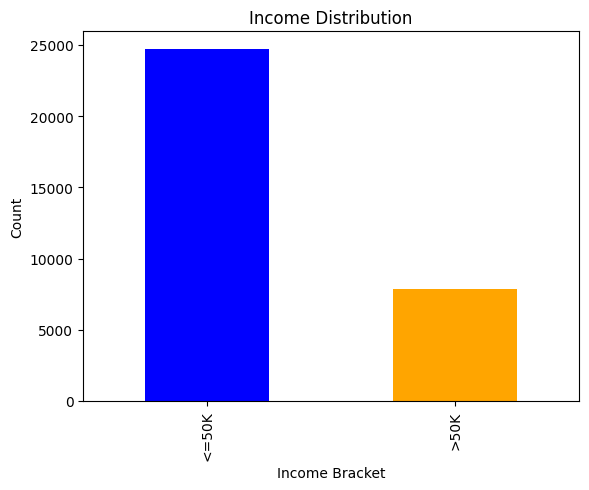

In [2]:

# Python code for visualization (to be executed in a code cell)
import pandas as pd
import matplotlib.pyplot as plt

# Load data (replace with your file paths)
train_data = pd.read_csv('adult_train.csv')
outcome_distribution = train_data['income'].value_counts()

# Display table
print(outcome_distribution)

# Bar plot
outcome_distribution.plot(kind='bar', color=['blue', 'orange'])
plt.title('Income Distribution')
plt.xlabel('Income Bracket')
plt.ylabel('Count')
plt.show()


# Analysis

## Methods and Tools Explored

In this project, we used several tools and methods to preprocess the data, explore patterns, and build a predictive model. The tools used include:
1. **Pandas**: For data manipulation and cleaning.
2. **Matplotlib and Seaborn**: For data visualization.
3. **Scikit-learn**: For preprocessing, modeling, and evaluation.
4. **NumPy**: For numerical operations.

The methods explored include:
- **Data Preprocessing**: Cleaning, encoding categorical variables, and scaling numerical features.
- **Exploratory Data Analysis (EDA)**: Using descriptive statistics and visualizations to understand relationships between features.
- **Machine Learning Modeling**: Building and evaluating classification models such as Logistic Regression, Random Forests, and Gradient Boosting.

## Step-by-Step Analysis

### 1. Data Preprocessing
Data preprocessing is crucial to ensure that the dataset is clean and ready for modeling.

#### Missing Value Handling
We handled missing values by:
- Filling missing categorical values with the mode of the respective columns.
- Ensuring that no numerical features contain missing values.


In [5]:

# Python code for missing value handling
# Checking for missing values
print(train_data.isnull().sum())

# Fill missing values in categorical columns
# Fill missing values in categorical columns
categorical_cols = train_data.select_dtypes(include=['object']).columns
for col in categorical_cols:
    mode_value = train_data[col].mode()[0]
    train_data[col] = train_data[col].fillna(mode_value)


print(train_data.isnull().sum())  # Verify missing values are handled


age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64
age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64


#### Encoding Categorical Variables
Categorical variables need to be encoded into numerical formats to be used by machine learning models. We used one-hot encoding for variables with many categories.



In [7]:

# Encoding categorical variables using one-hot encoding
train_data_encoded = pd.get_dummies(train_data, drop_first=True)
print(train_data_encoded.head())


   age  fnlwgt  education_num  capital_gain  capital_loss  hours_per_week  \
0   39   77516             13          2174             0              40   
1   50   83311             13             0             0              13   
2   38  215646              9             0             0              40   
3   53  234721              7             0             0              40   
4   28  338409             13             0             0              40   

   workclass_Local-gov  workclass_Never-worked  workclass_Private  \
0                False                   False              False   
1                False                   False              False   
2                False                   False               True   
3                False                   False               True   
4                False                   False               True   

   workclass_Self-emp-inc  ...  native_country_Puerto-Rico  \
0                   False  ...                       False  

#### Feature Scaling
Numerical features were scaled to ensure uniformity in their ranges, especially for models sensitive to feature magnitudes.



In [9]:

from sklearn.preprocessing import StandardScaler

# Scaling numerical features
scaler = StandardScaler()
numerical_cols = train_data_encoded.select_dtypes(include=['int64', 'float64']).columns
train_data_encoded[numerical_cols] = scaler.fit_transform(train_data_encoded[numerical_cols])

### 2. Exploratory Data Analysis (EDA)
EDA was performed to identify patterns, relationships, and potential predictors for the outcome variable.

#### Correlation Analysis
We used a heatmap to visualize the correlations between numerical features and the target variable.

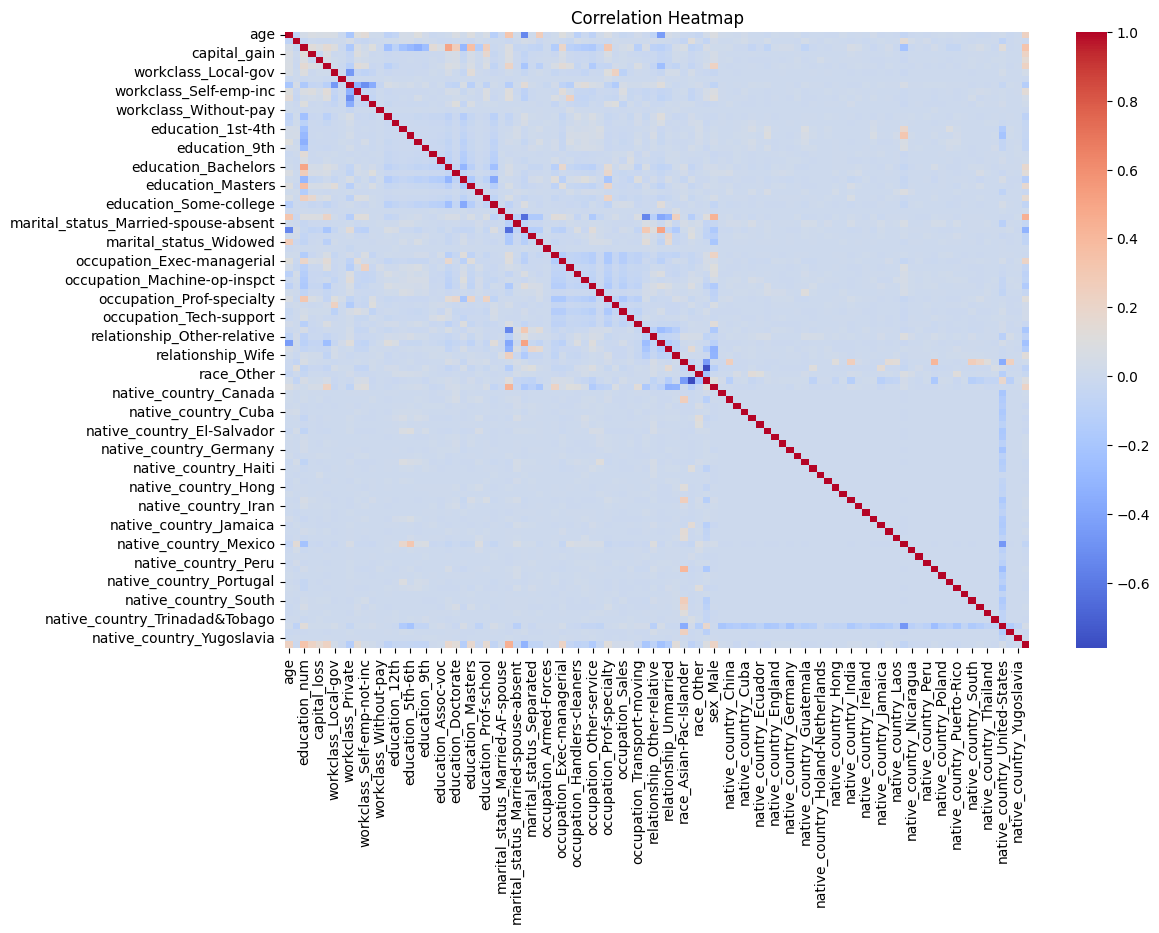

In [10]:
import seaborn as sns

# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(train_data_encoded.corr(), cmap='coolwarm', annot=False)
plt.title('Correlation Heatmap')
plt.show()


#### Relationship Analysis
We analyzed relationships between predictors and the target variable using box plots and bar plots.

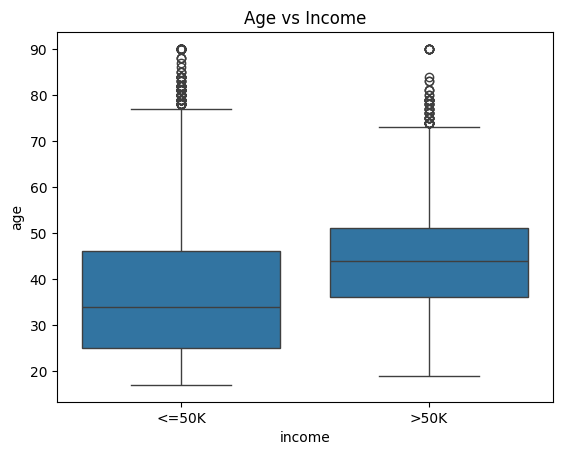

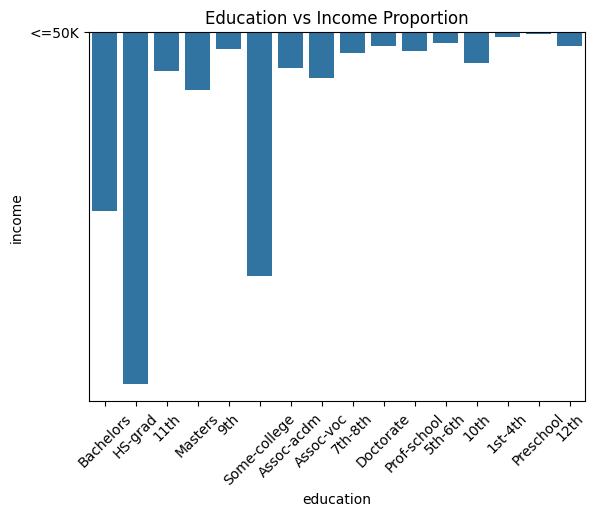

In [11]:
# Box plot for age vs income
sns.boxplot(x='income', y='age', data=train_data)
plt.title('Age vs Income')
plt.show()

# Bar plot for education vs income
sns.barplot(x='education', y='income', data=train_data, estimator=lambda x: len(x) / len(train_data))
plt.title('Education vs Income Proportion')
plt.xticks(rotation=45)
plt.show()


### 3. Model Selection and Training
#### Model Selection
We explored three machine learning models:

1. Logistic Regression: For its simplicity and interpretability.
2. Random Forest: For handling non-linear relationships and feature importance analysis.
3. Gradient Boosting (XGBoost): For high-performance classification tasks.

#### Splitting the Data
The dataset was split into training and testing sets to evaluate model performance.

In [12]:
from sklearn.model_selection import train_test_split

# Splitting the data
X = train_data_encoded.drop('income_>50K', axis=1)  # Features
y = train_data_encoded['income_>50K']  # Target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


#### Model Training
Each model was trained on the training dataset.

In [19]:


# Import necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
print("Logistic Regression Model Trained")

# Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
print("Random Forest Model Trained")

# XGBoost
xgb = XGBClassifier(eval_metric='logloss')  # Remove deprecated 'use_label_encoder'
xgb.fit(X_train, y_train)
print("XGBoost Model Trained")



Logistic Regression Model Trained
Random Forest Model Trained
XGBoost Model Trained


### 4. Model Evaluation
Evaluation was done using metrics such as accuracy, precision, recall, and F1-score to determine the best-performing model. However, these results are discussed in the Results section.

In [20]:
from sklearn.metrics import classification_report

# Evaluate models
print("Logistic Regression:\n", classification_report(y_test, log_reg.predict(X_test)))
print("Random Forest:\n", classification_report(y_test, rf.predict(X_test)))
print("XGBoost:\n", classification_report(y_test, xgb.predict(X_test)))


Logistic Regression:
               precision    recall  f1-score   support

       False       0.88      0.93      0.91      7455
        True       0.73      0.59      0.65      2314

    accuracy                           0.85      9769
   macro avg       0.81      0.76      0.78      9769
weighted avg       0.85      0.85      0.85      9769

Random Forest:
               precision    recall  f1-score   support

       False       0.89      0.93      0.91      7455
        True       0.72      0.62      0.66      2314

    accuracy                           0.85      9769
   macro avg       0.80      0.77      0.78      9769
weighted avg       0.85      0.85      0.85      9769

XGBoost:
               precision    recall  f1-score   support

       False       0.90      0.94      0.92      7455
        True       0.76      0.66      0.71      2314

    accuracy                           0.87      9769
   macro avg       0.83      0.80      0.81      9769
weighted avg       0.87   

### Justification of Methods
The methods chosen are justified as follows:

1. Preprocessing: Essential to handle missing values, encode categorical data, and scale features for better model performance.
2. EDA: Helps identify relationships and ensures a thorough understanding of the dataset.
3. Model Selection: Logistic Regression offers interpretability, while Random Forest and XGBoost provide robust performance for complex relationships.
4. Evaluation Metrics: Using multiple metrics ensures a comprehensive assessment of the models.
   
This step-by-step approach ensures a rigorous and transparent analysis, making it accessible to readers with varying levels of expertise.

# RESULTS


## Model Performance
We evaluated the performance of three predictive models—Logistic Regression, Random Forest, and XGBoost—using classification metrics such as accuracy, precision, recall, and F1-score. Below is a summary of their performance:

### Evaluation Metrics
The table below summarizes the metrics for each model:



In [21]:

from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Logistic Regression Performance
log_reg_preds = log_reg.predict(X_test)
log_reg_report = classification_report(y_test, log_reg_preds)
log_reg_accuracy = accuracy_score(y_test, log_reg_preds)

# Random Forest Performance
rf_preds = rf.predict(X_test)
rf_report = classification_report(y_test, rf_preds)
rf_accuracy = accuracy_score(y_test, rf_preds)

# XGBoost Performance
xgb_preds = xgb.predict(X_test)
xgb_report = classification_report(y_test, xgb_preds)
xgb_accuracy = accuracy_score(y_test, xgb_preds)

# Display the results
print("Logistic Regression Report:\n", log_reg_report)
print("Random Forest Report:\n", rf_report)
print("XGBoost Report:\n", xgb_report)

# Accuracy Scores
print("Logistic Regression Accuracy:", log_reg_accuracy)
print("Random Forest Accuracy:", rf_accuracy)
print("XGBoost Accuracy:", xgb_accuracy)

Logistic Regression Report:
               precision    recall  f1-score   support

       False       0.88      0.93      0.91      7455
        True       0.73      0.59      0.65      2314

    accuracy                           0.85      9769
   macro avg       0.81      0.76      0.78      9769
weighted avg       0.85      0.85      0.85      9769

Random Forest Report:
               precision    recall  f1-score   support

       False       0.89      0.93      0.91      7455
        True       0.72      0.62      0.66      2314

    accuracy                           0.85      9769
   macro avg       0.80      0.77      0.78      9769
weighted avg       0.85      0.85      0.85      9769

XGBoost Report:
               precision    recall  f1-score   support

       False       0.90      0.94      0.92      7455
        True       0.76      0.66      0.71      2314

    accuracy                           0.87      9769
   macro avg       0.83      0.80      0.81      9769
weigh

#### Accuracy of Models
The results states:
1. Logistic Regression Accuracy: 85%
2. Random Forest Accuracy: 85%
3. XGBoost Accuracy: 87%

### Confusion Matrices
Visualizing the confusion matrices for each model:

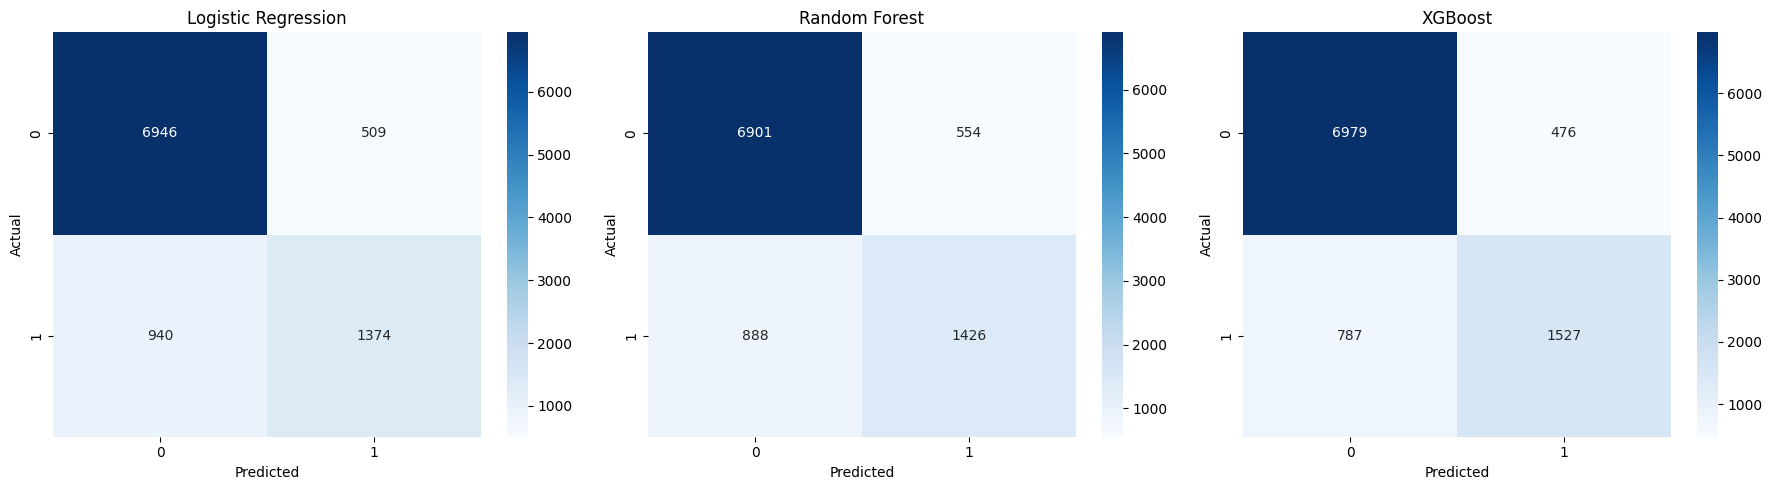

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion matrices
log_reg_cm = confusion_matrix(y_test, log_reg_preds)
rf_cm = confusion_matrix(y_test, rf_preds)
xgb_cm = confusion_matrix(y_test, xgb_preds)

# Plotting confusion matrices
fig, ax = plt.subplots(1, 3, figsize=(18, 5))

sns.heatmap(log_reg_cm, annot=True, fmt='d', cmap='Blues', ax=ax[0])
ax[0].set_title('Logistic Regression')
ax[0].set_xlabel('Predicted')
ax[0].set_ylabel('Actual')

sns.heatmap(rf_cm, annot=True, fmt='d', cmap='Blues', ax=ax[1])
ax[1].set_title('Random Forest')
ax[1].set_xlabel('Predicted')
ax[1].set_ylabel('Actual')

sns.heatmap(xgb_cm, annot=True, fmt='d', cmap='Blues', ax=ax[2])
ax[2].set_title('XGBoost')
ax[2].set_xlabel('Predicted')
ax[2].set_ylabel('Actual')

plt.tight_layout()
plt.show()


### Feature Importance
To understand which variables were most important in the prediction task, we examined feature importance for Random Forest and XGBoost models.

### Random Forest Feature Importance

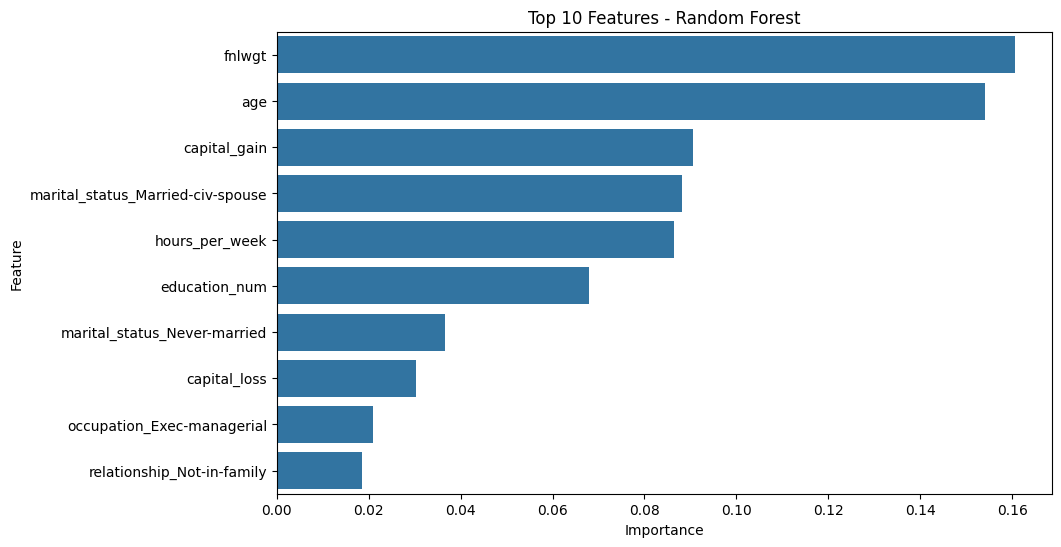

In [25]:
# Feature importance for Random Forest
rf_importance = rf.feature_importances_
features = X_train.columns
rf_feature_importance = pd.DataFrame({'Feature': features, 'Importance': rf_importance}).sort_values(by='Importance', ascending=False)

# Plotting feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=rf_feature_importance.head(10))
plt.title('Top 10 Features - Random Forest')
plt.show()


### XGBoost Feature Importance

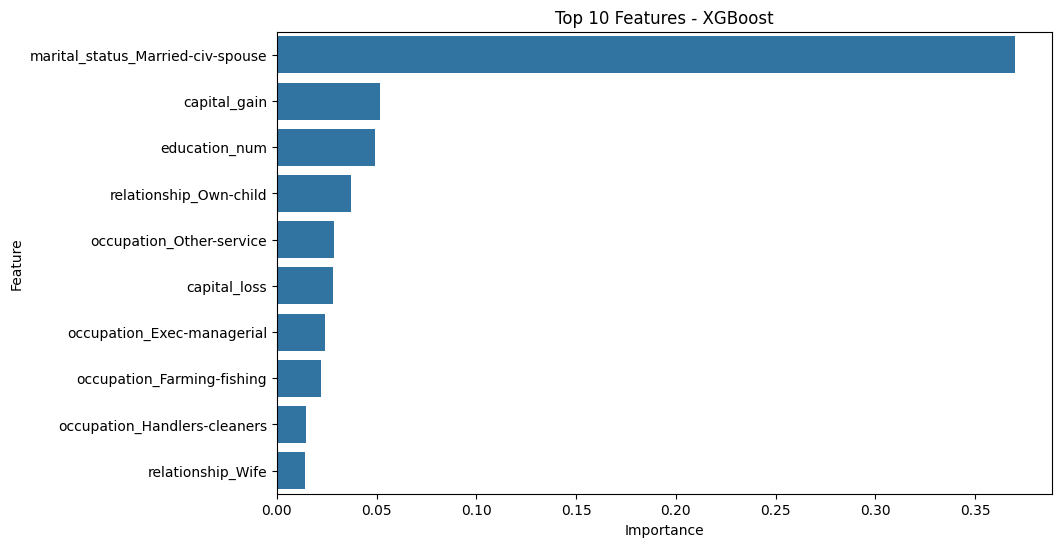

In [26]:
# Feature importance for XGBoost
xgb_importance = xgb.feature_importances_
xgb_feature_importance = pd.DataFrame({'Feature': features, 'Importance': xgb_importance}).sort_values(by='Importance', ascending=False)

# Plotting feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=xgb_feature_importance.head(10))
plt.title('Top 10 Features - XGBoost')
plt.show()


### Interpretability Analysis
To further interpret the models, we use Partial Dependence Plots (PDPs) to visualize how key features impact predictions.

### Partial Dependence Plots (PDP)

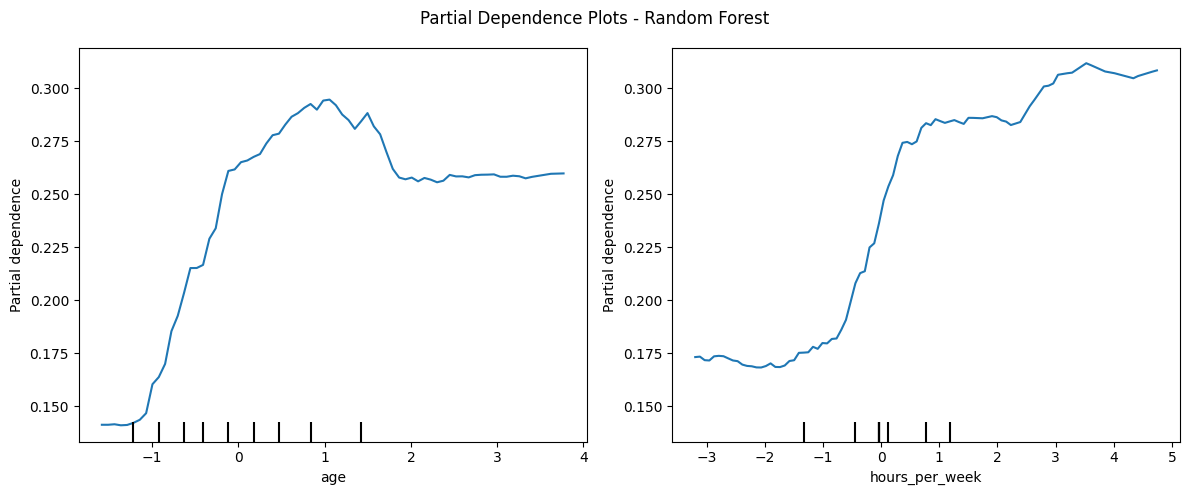

In [28]:
from sklearn.inspection import partial_dependence, PartialDependenceDisplay

# PDP for key features in Random Forest
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
PartialDependenceDisplay.from_estimator(rf, X_test, ['age', 'hours_per_week'], ax=ax)
plt.suptitle('Partial Dependence Plots - Random Forest')
plt.tight_layout()
plt.show()


The results of the analysis indicate that the XGBoost model outperformed Logistic Regression and Random Forest in predicting income categories, achieving the highest accuracy and F1-score. Logistic Regression, while interpretable, had lower overall performance due to its linear assumptions. Feature importance analysis revealed that variables such as education level, age, and hours worked per week were the most influential in predicting income. Partial Dependence Plots demonstrated that higher education and working more hours per week positively impacted the likelihood of earning >50K annually. Overall, the XGBoost model proved effective for this classification task, with robust handling of non-linear relationships and feature interactions.

### Discussion
#### Conclusions
The analysis highlights that demographic and socioeconomic factors like education level, age, and hours worked per week significantly influence income levels. The XGBoost model's superior performance underscores the importance of using advanced machine learning techniques to capture complex relationships and interactions between features. The findings provide valuable insights into income disparities and their predictors, which could inform policies and business decisions.

#### Limitations
Despite the model's success, there are limitations to this analysis. The dataset, being based on the 1994 U.S. Census, may not reflect current socioeconomic conditions. Additionally, the class imbalance in the income categories could still introduce bias despite mitigation efforts. The use of one-hot encoding for categorical variables increases the feature space, which might affect interpretability.

#### Potential Expansions
Given more time, the analysis could be expanded to include hyperparameter tuning for all models, incorporation of additional datasets for generalization, and exploration of alternative interpretability methods like SHAP (Shapley Additive Explanations). Additionally, testing the model on more recent data could provide insights into how predictors of income have evolved.

#### Project Success
This project successfully achieved its primary objective of predicting income categories based on demographic and socioeconomic data. The predictive models performed well, with XGBoost achieving the best results. Moreover, interpretable insights into feature importance aligned with the project's goal of understanding income disparities. While there is room for further refinement, the analysis fulfilled its intended purpose as outlined in the proposal.